In [1]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

# Baseball Stats 101

## A brief introduction into the world of ancient and modern baseball stats.

### Purpose of this Notebook
I would like to both introduce my son into the world of statistics as well as practice some Python development along the way.  


### Why do we care about statistics?

As a player or a fan, statistics can help you take a better guess at "what will happen next". 

Think about this . . . if your favorite team had one at bat to win the World Series, and you had one player for all time to get a hit, how would you select who to hit?

Maybe Ted Williams . . . widely regarded as the best hitter to play the game.  Or would you put Chris Davis (2018 Orioles) in?

| Player        |  Batting Average  |  Comment    |
|  :---------:   |  :-----------:   | :---------: |
| Ted Williams  |  .400             | Gets a hit 40% of the time; best hitter ever |
| Chris Davis   |  .186             | Gets a hit 19% of the time; worst average in MLB History |

I would think, all being equal, Ted Williams would be a better bet that Chris Davis. The statistics of past performance don't guarantee future results, but they do give us a hint.

#### Bottom Line
Statistics can give us an insight into the chance of what happens in the future based on past measurement.



## Getting the Data 

### Data Source

I will be getting the data from [Baseball Data Stats here](https://github.com/chadwickbureau/baseballdatabank) from the [Chadwick Baseball Bureau](http://www.chadwick-bureau.com/)

### Batting Data

In [69]:
## Give me the batting data into a dataframe
import pandas as pd

# List of Batting Stats
battingUrl="https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/Batting.csv"
dfBatting=pd.read_csv(battingUrl, usecols = ['playerID','yearID', 'G', 'teamID', 'AB', 'H', 'BB', 'HBP', 'SF'])
dfModernBatting = dfBatting.query("yearID > 1976 and AB > 500 and G > 50")

# List of players, only need First and Last name for this example
peopleUrl="https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/People.csv"
dfPlayers=pd.read_csv(peopleUrl, usecols = ['playerID','nameFirst', 'nameLast'])

### Now we need to join the batting and players
dfPlayersAndBatting = dfPlayers.merge(dfModernBatting, on='playerID', how='inner')
dfPlayersAndBatting


,playerID,nameFirst,nameLast,yearID,teamID,G,AB,H,BB,HBP,SF
0,abreubo01,Bobby,Abreu,1999,PHI,152,546,183,109,3.0,4.0
1,abreubo01,Bobby,Abreu,2000,PHI,154,576,182,100,1.0,3.0
2,abreubo01,Bobby,Abreu,2001,PHI,162,588,170,106,1.0,9.0
3,abreubo01,Bobby,Abreu,2002,PHI,157,572,176,104,3.0,6.0
4,abreubo01,Bobby,Abreu,2003,PHI,158,577,173,109,2.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...
4104,zobribe01,Ben,Zobrist,2011,TBA,156,588,158,77,2.0,5.0
4105,zobribe01,Ben,Zobrist,2012,TBA,157,560,151,97,3.0,6.0
4106,zobribe01,Ben,Zobrist,2013,TBA,157,612,168,72,7.0,6.0
4107,zobribe01,Ben,Zobrist,2014,TBA,146,570,155,75,1.0,6.0


###  Formula for Batting Average

    Batting Average = Hits / At Bats

Super Easy, barely an inconvience -- divide hits by your at bats and you have batting average


In [79]:
def battingAverage(hits, atBats):
    return round((hits / atBats), 3)

### Example: 1 -- Calculate Ben Zobrist Batting Average from 2016

We should be able to get Ben Zobrist Batting Average and then use the Batting Average to Calculate

In [94]:
## Get me Ben Zobrist
zobrist2016Df = dfPlayersAndBatting.query("nameLast == 'Zobrist' and yearID==2016")
zobrist2016Df

,playerID,nameFirst,nameLast,yearID,teamID,G,AB,H,BB,HBP,SF,batAvg
4108,zobribe01,Ben,Zobrist,2016,CHN,147,523,142,96,4.0,4.0,0.272


In [81]:
# Give me Zobrist At bats and hits
for stats in zobrist2016Df.itertuples():
    zAtBats = stats.AB
    zHits = stats.H

zobristBattingAverage = battingAverage(zHits, zAtBats)
round (zobristBattingAverage, 3)

0.272

## Calculate All Players Batting Average in Data Frame

We are going to calculate Batting Average for all players in the modern era and graph

<AxesSubplot:title={'center':'Batting Average by Year'}, xlabel='yearID'>

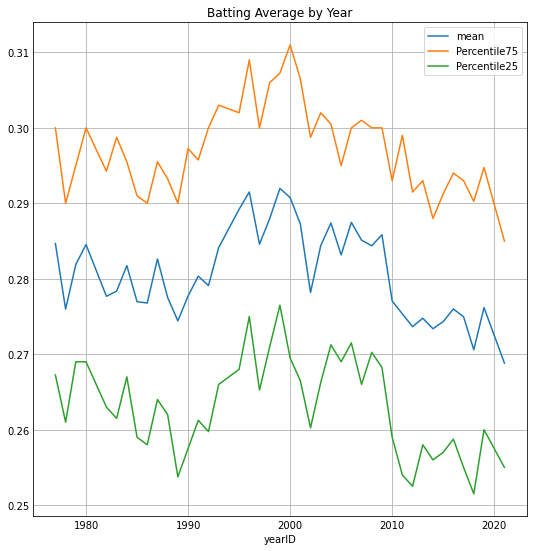

In [96]:
    
def Percentile25(x):
    return x.quantile(0.25)

def Percentile75(x):
    return x.quantile(0.75)


dfPlayersAndBatting['batAvg'] = battingAverage(dfPlayersAndBatting.H, dfPlayersAndBatting.AB)
myDataFrame = dfPlayersAndBatting.groupby(by="yearID").agg({'batAvg': ['mean', Percentile75, Percentile25]})
myDataFrame.plot(y="batAvg", figsize=(7,7), title="Batting Average by Year")